# OBJECTFS
- Observer l'effet de $\rho$, $\sigma_a$ et $\sigma_c$ sur $E$, $F$, et $T$ 
- Comprendre comment utiliser les reaseaux de neuronnes pour retrouver les tendances observees

# SETUP

## Les imports

In [264]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

## Chargement des donnees

In [265]:
# """ VERSION COLAB """

# # to load data from my personal github repo (update it if we have to)
# import os
# if not os.path.exists("assets"):
#     print("Data wansn't here. Let's download it!")
#     !git clone https://github.com/desmond-rn/assets.git
# else:
#     print("Data already here. Let's update it!")
#     %cd assets
#     # %rm -rf assets
#     !git pull https://github.com/desmond-rn/assets.git
#     %cd ..

# print("\n")
# !ls assets/dataframes/inverse

# # df_spatial_path = "assets/dataframes/inverse/df_spatial.csv"
# # df_temporal_path = "assets/dataframes/inverse/df_temporal.csv"

# df_spatial_path = "assets/dataframes/inverse/df_spatial_dirac.csv"
# df_temporal_path = "assets/dataframes/inverse/df_temporal_dirac.csv"

In [266]:
""" VERSION JUPYTER """

# to load data locally

%ls "../../data"

# df_spatial_path = "../../data/df_spatial.csv"
# df_temporal_path = "../../data/df_temporal.csv"

# df_spatial_path = "../../data/df_spatial_dirac.csv"
# df_temporal_path = "../../data/df_temporal_dirac.csv"

df_spatial_path = "../../data/df_spatial_olson.csv"
df_temporal_path = "../../data/df_temporal_olson.csv"

Volume in drive C has no label.
 Volume Serial Number is 2248-85E1

 Directory of c:\Users\Roussel\Dropbox\Unistra\SEMESTRE 2\Projet\Inverse\moco-inverse\data

20/05/2020  11:18    <DIR>          .
20/05/2020  11:18    <DIR>          ..
17/05/2020  10:11            61,341 dataframe_1.csv
17/05/2020  10:11            87,844 dataframe_2.csv
16/05/2020  15:20             1,394 df_1.csv
20/05/2020  10:21            32,855 df_1_test.csv
16/05/2020  15:20             1,484 df_2.csv
20/05/2020  10:21            41,130 df_2_test.csv
19/05/2020  21:04             8,190 df_spatial.csv
20/05/2020  11:14           234,814 df_spatial_dirac.csv
20/05/2020  14:06           100,552 df_spatial_olson.csv
19/05/2020  21:04         2,383,217 df_temporal.csv
20/05/2020  11:14        18,596,476 df_temporal_dirac.csv
20/05/2020  14:06         1,673,335 df_temporal_olson.csv
19/05/2020  22:44    <DIR>          img
              12 File(s)     23,222,632 bytes
               3 Dir(s)  99,220,783,104 bytes free

### Donnees spatialles

In [267]:
# types = {'x_min':int, 'x_max':int, 'N':float, 'c':int, 'a':int, 'C_v':int, 'CFL':float, 'precision':float, 't_init':float, 't_simu':float, 'rho_expr':float, 'sigma_a_expr':float, 'sigma_c_expr':float, 'E_init_expr':str, 'F_init_expr':str, 'T_init_expr':str, 'dt':float, 'step_count':int, 'x':str, 'rho':str, 'sigma_a':str, 'sigma_c':str, 'E_init':str, 'E_final':str, 'F_init':str, 'F_final':str, 'T_init':str, 'T_final':str, 'E_exact_final':str, 'F_exact_final':str, 'T_exact_final':str}
# df_s = pd.read_csv(df_spatial_path, thousands=',')

# types = {'c':float, 'rho_expr':float, 'sigma_a_expr':float, 'sigma_c_expr':float, 't_simu':float}           ## DIRAC
types = {'c':float, 'rho_expr':float, 'sigma_a_expr':str, 'sigma_c_expr':float, 't_simu':float}           ## OLSON
df_s = pd.read_csv(df_spatial_path, thousands=',', dtype=types)

df_s.head(1)

,x_min,x_max,N,c,a,C_v,CFL,precision,t_0,t_f,...,sigma_c,E_0,F_0,T_0,E_f,F_f,T_f,E_exact_f,F_exact_f,T_exact_f
0,0,3,100,1.0,1.0,1.0,0.5,0.000001,0,1.0,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.25e-06, 6.25e-06, 6.25e-06, 6.25e-06, 6.25e...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...","[0.364627, 0.364709, 0.364777, 0.364824, 0.364...","[0.63534, 0.635188, 0.635032, 0.634863, 0.6346...","[0.776859, 0.776891, 0.776894, 0.776852, 0.776...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [268]:
df_s.dtypes

x_min             int64
x_max             int64
N                 int64
c               float64
a               float64
C_v             float64
CFL             float64
precision       float64
t_0               int64
t_f             float64
rho_expr        float64
sigma_a_expr     object
sigma_c_expr    float64
E_0_expr         object
F_0_expr          int64
T_0_expr        float64
dt              float64
step_count        int64
x                object
rho              object
sigma_a          object
sigma_c          object
E_0              object
F_0              object
T_0              object
E_f              object
F_f              object
T_f              object
E_exact_f        object
F_exact_f        object
T_exact_f        object
dtype: object

### Donnees temporelles

In [269]:
# types = {'x_min':int, 'x_max':int, 'N':int, 'c':int, 'a':int, 'C_v':int, 'CFL':float, 'epsilon':float, 't_init':float, 't_simu':float, 'rho_expr':float, 'sigma_a_expr':float, 'sigma_c_expr':float, 'E_x_0_expr':str, 'F_x_0_expr':str, 'T_x_0_expr':str, 'dt':float, 'step_count':int, 't':str, 'E_left':str, 'E_right':str, 'F_left':str, 'F_right':str, 'T_left':str, 'T_right':str}
# df_t = pd.read_csv(df_temporal_path, thousands=',')

# types = {'c':float, 'rho_expr':float, 'sigma_a_expr':float, 'sigma_c_expr':float, 't_simu':float}           # DIRAC
types = {'c':float, 'rho_expr':float, 'sigma_a_expr':str, 'sigma_c_expr':float, 't_simu':float}           # OLSON
df_t = pd.read_csv(df_temporal_path, thousands=',', dtype=types)

df_t.head(1)

,x_min,x_max,N,c,a,C_v,CFL,precision,t_0,t_f,...,F_left,F_right,T_left,T_right,E_exact_left,E_exact_right,F_exact_left,F_exact_right,T_exact_left,T_exact_right
0,0,3,100,1.0,1.0,1.0,0.5,0.000001,0,1.0,...,"[0, 0.249998, 0.374998, 0.456078, 0.51332, 0.5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.05, 0.05, 0.239158, 0.365237, 0.45244, 0.51...","[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [270]:
# df_t.dtypes

## Retraitement des donnees

- Les colonnes `rho_expr`, `sigma_a_expr`, `sigma_a_expr` sont normalement des expressions de fonctions. Mais pour aller plus vite, nous les avons importer comme des flottants car ces parametres sont constants pour chque simulation (une ligne de la dataframe).  
- Les tablaux `x`, `rho`, ... `T_final` sont importes comme des chaines de caracteres. Tranformons les en listes Python pour facilement les traiter.

In [271]:
""" convertissons 'x', 'rho', 'sigma_a', 'sigma_c', 'E_init', 'E_final', 'F_init', 'F_final', 'T_init', 'T_final' en listes de nombres"""

# columns = ['x', 'rho', 'sigma_a', 'sigma_c', 'E_init', 'E_final', 'F_init', 'F_final', 'T_init', 'T_final', 'E_exact_final', 'F_exact_final', 'T_exact_final']
columns = ['x', 'rho', 'sigma_a', 'sigma_c', 'E_0', 'F_0', 'T_0', 'E_f', 'F_f', 'T_f']

def str_to_list(line):
  for column in columns:
    tmp  = line[column]
    tmp = ast.literal_eval(tmp)
    line[column] = tmp
  return line

df_s = df_s.apply(str_to_list, axis=1)


In [272]:
""" convertissons 't', 'E_left', 'E_right', 'F_left', 'F_right', 'T_left', 'T_right' en listes de nombres"""

# columns = ['t', 'E_left', 'E_right', 'F_left', 'F_right', 'T_left', 'T_right', 'E_exact_left', 'E_exact_right', 'F_exact_left', 'F_exact_right', 'T_exact_left', 'T_exact_right']
# columns = ['t', 'E_left', 'E_center', 'F_left', 'F_right', 'T_left', 'T_right', 'E_exact_left', 'E_exact_center', 'F_exact_left', 'F_exact_right', 'T_exact_left', 'T_exact_right']
columns = ['t', 'E_left', 'E_right', 'F_left', 'F_right', 'T_left', 'T_right']
df_t = df_t.apply(str_to_list, axis=1)

## Verification

In [273]:
""" Verifions que seulement `rho_expr`, `sigma_a_expr` et `sigma_c_expr` varient """
print("min-max donnees spatiales")
display(df_s.describe().loc[['min', 'max']])

print("\n min-max donnees temporelles")
display(df_t.describe().loc[['min', 'max']])

min-max donnees spatiales


,x_min,x_max,N,c,a,C_v,CFL,precision,t_0,t_f,rho_expr,sigma_c_expr,F_0_expr,T_0_expr,dt,step_count
min,0.0,3.0,100.0,1.0,0.01372,0.14361,0.25,0.000001,0.0,0.001,0.056234,0.0,0.0,0.050000,0.000025,40.0
max,0.0,3.0,100.0,299.0,1.00000,1.00000,0.50,0.000001,0.0,3.000,1.000000,0.0,0.0,0.056234,0.015000,13334.0



 min-max donnees temporelles


,x_min,x_max,N,c,a,C_v,CFL,precision,t_0,t_f,rho_expr,sigma_c_expr,F_0_expr,T_0_expr,dt,step_count
min,0.0,3.0,100.0,1.0,0.01372,0.14361,0.25,0.000001,0.0,0.001,0.056234,0.0,0.0,0.050000,0.000025,40.0
max,0.0,3.0,100.0,299.0,1.00000,1.00000,0.50,0.000001,0.0,3.000,1.000000,0.0,0.0,0.056234,0.015000,13334.0


Ce tableau confirme bien que $\rho$, $\sigma_a$ et $\sigma_c$ (respectivement `rho_expr`, `sigma_a_expr` et `sigma_c_expr`) sont les seules parametres qui varient dans nos donnees. En particulier, le temps de simulation vaut `0.5` dans toutes les lignes.

# VISUALISATION

## Fonctions utilitaires

In [274]:
""" plot pour une ligne les signaux y """

def plot_signal(ax, df, marker, index, x, y):
  abscissa = np.array(df.loc[index, x])

  nbplots = len(y)
  ordinate = np.empty((nbplots, len(abscissa)))

  for j in range(nbplots):
    ordinate[j] = np.array(df.loc[index, y[j]])
    ax.plot(abscissa, ordinate[j], marker[j],label=y[j])
    # ax.plot(abscissa[:60], ordinate[j][:60], marker[j],label=y[j])
    ax.legend(shadow=True, fontsize='medium')

In [275]:
""" plot plusieurs lignes de la dataframe signaux par groupes """

def plot_group(df, figsize, markers, index, x, groups, title=None):
  nrows = len(index)
  ncols = len(groups)
  fig, ax = plt.subplots(nrows, ncols, figsize=figsize, sharex=True, sharey=True)

  for i in range(nrows):
    for j in range(ncols):
      if nrows == 1 and ncols == 1:     # une seule ligne pour un seul groupe de signaux
        local_ax = ax
      elif nrows == 1:                  # on plot une seule ligne de la dataframe -- Probleme d'indexation Matplotlib!
        local_ax = ax[j]
      elif ncols == 1:                  # on plot une seule catagorie de signaux pour plusieurs lignes
        local_ax = ax[i]
      else:                             # plot multiple ligne multipe groups
        local_ax = ax[i, j]
      
      # local_ax.set_ylim([-1.05, 1.05])
      # local_ax.set_title(r'$\rho=$'+str(df.loc[index[i], 'rho_expr'])+',    $\sigma_a=$'+str(df.loc[index[i], 'sigma_a_expr'])+',    $\sigma_c=$'+str(df.loc[index[i], 'sigma_c_expr']))
      if i == nrows-1:
        if x=='x':
          local_ax.set_xlabel('position', fontsize='large')
        elif x=='t':
          local_ax.set_xlabel('temps', fontsize='large')
      
      plot_signal(local_ax, df, markers[j], index[i], x, groups[j])
  
  if title != None:
    plt.suptitle(title, fontsize='x-large', y=1.05)
  plt.tight_layout()


In [276]:
""" Quelque groupes et abcisses interressants a visualiser"""

""" Abcisses spatialle """
position = 'x'

""" Visu spatiale 1 """
init = ['E_0', 'F_0', 'T_0']
final = ['E_f', 'F_f', 'T_f']
group_1 = [init, final]

""" Visu spatiale 2 """
E = ['E_0', 'E_f']
F = ['F_0', 'F_f']
T = ['T_0', 'T_f']
group_2 = [E, F, T]


""" Abcisses temporelle """
time = 't'

""" Visu temporelle 1 """
left = ['E_left', 'F_left', 'T_left']
right = ['E_right', 'F_right', 'T_right']
group_3 = [left, right]

""" Visu temporelle 2 """
E_edges = ['E_left', 'E_right']
F_edges = ['F_left', 'F_right']
T_edges = ['T_left', 'T_right']
group_4 = [E_edges, F_edges, T_edges]

In [277]:
""" Creeons les valeurs min et max a utiliser pour les visulations """
rho_min = df_s.loc[:, 'rho_expr'].min()
rho_max = df_s.loc[:, 'rho_expr'].max()

sigma_a_min = df_s.loc[:, 'sigma_a_expr'].min()
sigma_a_max = df_s.loc[:, 'sigma_a_expr'].max()

sigma_c_min = df_s.loc[:, 'sigma_c_expr'].min()
sigma_c_max = df_s.loc[:, 'sigma_c_expr'].max()

## Cas test 1: Gaussienne

In [278]:
# index = 1     # Testons la methode en ce point

# x = np.array(df_s.loc[index, 'x'])
# y1 = np.array(df_s.loc[index, 'E_0'])
# y2 = np.array(df_s.loc[index, 'F_0'])
# y3 = np.array(df_s.loc[index, 'E_f'])
# y4 = np.array(df_s.loc[index, 'F_f'])

# fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
# ax[0].plot(x,y1, label="E")
# ax[0].plot(x,y2, label="F")
# ax[0].set_xlabel('x')
# ax[0].legend()

# ax[1].plot(x,y3+y4,"g-", label="E + F")
# ax[1].plot(x,y3-y4, "r-", label="E - F")
# ax[1].set_xlabel('x')
# ax[1].legend()

# c = df_s.loc[index, 'c']
# sigma_a = df_s.loc[index, 'sigma_a_expr']
# sigma_c = df_s.loc[index, 'sigma_c_expr']
# title = "Test de validation de la methode"
# title += r' pour $c=$'+str(c)+', $\sigma_a=$'+str(int(sigma_a))+', et $\sigma_c=$'+str(int(sigma_c))

# plt.suptitle(title, fontsize="x-large", y=1.05)
# plt.tight_layout()

Pour $\sigma_a= \sigma_c= 0$, on observe bien un transport du signal $E+F$ a la vitesse $c=1$ et un transport de $E-F$ a la vitesse $-c$.

## Cas test 2: Dirac

In [279]:
# # pos = 6
# pos = 3

# condition = (df_s['sigma_a_expr']==0.0) & (df_s['sigma_c_expr']==df_s['c']) & (df_s['sigma_c_expr']==1000) 
# # condition = (df_s['sigma_a_expr']==0.0) & (df_s['sigma_c_expr']==df_s['c']==sigma_c_max) & (df_s['sigma_c_expr']==sigma_c_max) & (df_s['t_simu']==0.25) 
# index = df_s.loc[condition].index[pos:pos+1]

# E_test_2 = ['E_0', 'E_f', 'E_exact_f']
# # F_test_2 = ['F_init', 'F_final', 'F_exact_final']
# F_test_2 = ['F_0', 'F_f']
# group_5 = [E_test_2, F_test_2]

# markers =[['-', '-', '--'], ['-', '-'] ] 

# figsize = (12, 4)

# c = df_s.loc[index, 'c']
# sigma_a = df_s.loc[index, 'sigma_a_expr']
# sigma_c = df_s.loc[index, 'sigma_c_expr']
# t_f = df_s.loc[index, 't_f']
# title = "Test de validation"

# title += r', pour $\sigma_a=$'+str(int(sigma_a))+', $c=\sigma_c=$'+str(int(c))+ ', et $t_{final}=$' + str(t_f.values[0])

# plot_group(df_s, figsize, markers, index, position, group_5, title)


In [280]:
# E_test_1 = ['E_left', 'E_exact_left']
# # F_test_2 = ['F_left', 'F_exact_left']
# E_test_2 = ['E_center', 'E_exact_center']
# # F_test_2 = ['F_right', 'F_exact_right']
# group_5 = [E_test_1, E_test_2]

# markers =[['-', '--'], ['-', '--']]

# figsize = (12, 4)

# plot_group(df_t, figsize, markers, index, time, group_5, title)

## Cas test 3 : Olson-Auer-Hall

11


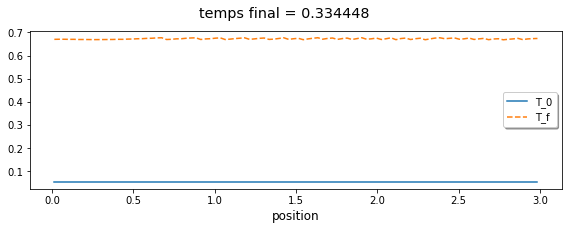

In [281]:
pos = len(df_s)-1
print(len(df_s))

condition =(df_s['sigma_c_expr']>=0)
# condition = (df_s['sigma_a_expr']==0.0) & (df_s['sigma_c_expr']==df_s['c']==sigma_c_max) & (df_s['sigma_c_expr']==sigma_c_max) & (df_s['t_simu']==0.25) 
index = df_s.loc[condition].index[pos:pos+1]
group_5 = [['T_0', 'T_f']]

markers =[['-', '--']] 

figsize = (8, 3)

sigma_a = df_s.loc[index, 'sigma_a_expr'].values[0]
t_f = df_s.loc[index, 't_f'].values[0]
E_0 = df_s.loc[index, 'E_0_expr'].values[0]
# title = r"Test de validation pour $\sigma_a$=" +str(sigma_a)+", $t_{final}$="+str(t_f) + " et $E_0=$"+str(E_0)
title = r"temps final = "+str(t_f)
# title = r"Test de validation pour $\sigma_a$=" +" et $t_{final}$="+repr(t_f)
# title = r"Test de validation d'Olson-Auer-Hall"


plot_group(df_s, figsize, markers, index, position, group_5, title)

## Influence de la densite $\rho$

### $\sigma_a$ non nul

In [282]:
""" Les indices a dessiner pour cette partie """
condition = (df_s['rho_expr']==0.5) | (df_s['rho_expr']==1) | (df_s['rho_expr']==2.5) | (df_s['rho_expr']==rho_max)
condition &= (df_s['sigma_a_expr']==2.5) & (df_s['sigma_c_expr']==sigma_c_min)
index = df_s.loc[condition].index

markers_s =[['-', '-', '-'], ['-', '-', '-']]

""" Visualisation spatiale """
figsize = (8, 5)
title = r"Influence de la densite pour $\sigma_a=2.5$ et $\sigma_c=0$"

plot_group(df_s, figsize, markers_s, index, position, group_1, title)

<Figure size 576x360 with 0 Axes>

In [283]:
""" Visualisation temporelle """

markers_t =[['-', '-', '-'], ['-', '-', '-']]

figsize = (8, 5)
title = r"Influence de la densite sur les signaux aux bords du domaine pour $\sigma_a=2.5$ et $\sigma_c=0$"

plot_group(df_t, figsize, markers_t, index, time, group_3, title)

<Figure size 576x360 with 0 Axes>

Des lors que $\sigma_a$ est non nul, on constate en plus du transfer, un phenomene de diffusion due a l'obsoption des photons et leur reemission dans une direction aleatoire. Cet interaction avec le milieu se traduit par une variation de sa temperature. Il semblerait que: 
- Plus la densite est elevee, plus l'energie diffusee $E$ est importante. 
- La densite n'a aucune influence sur le flux de photons $F$ 
- Plus la densite est elevee, moins importante (ou peut-etre plus lente) est la variantion de temperature $T$ ($T$ initiale etant non nul). On dirait que la temperature d'equilibre tant a etre elevee. 


### $\sigma_a$ nul


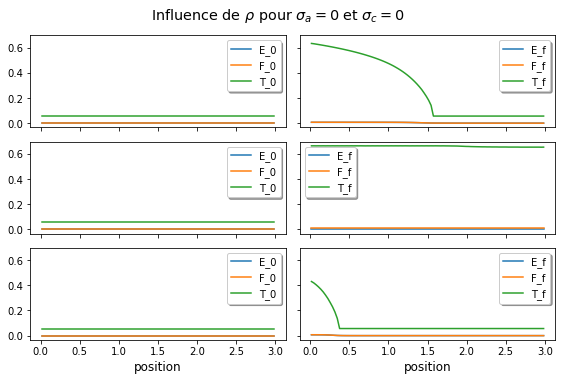

In [284]:
condition = (df_s['rho_expr']==rho_min) | (df_s['rho_expr']==rho_max)
condition &= (df_s['sigma_a_expr']==sigma_a_min) & (df_s['sigma_c_expr']==sigma_c_min)
index = df_s.loc[condition].index

figsize = (8, 5)
title = r"Influence de $\rho$ pour $\sigma_a=0$ et $\sigma_c=0$"

plot_group(df_s, figsize, markers_t, index, position, group_1, title)

On constate que faire varier $\rho$ n'influence pas les resultats. $\sigma_a$ etant nul, Ce resultat s'explique par l'abscence d'interatcion avec le milieu.

## Influence de l'opacite d'absorption $\sigma_a$

### $\rho$ non nul

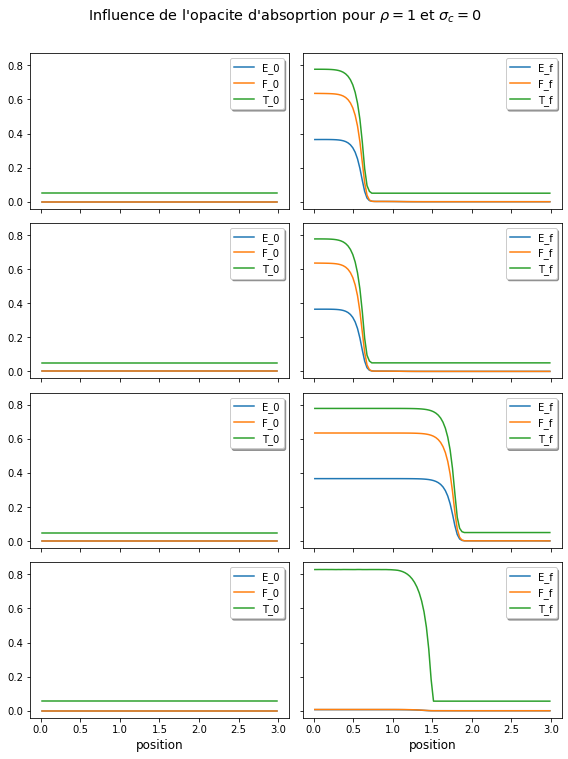

In [285]:
condition = (df_s['sigma_a_expr']==0.5) | (df_s['sigma_a_expr']==1) | (df_s['sigma_a_expr']==2.5) | (df_s['sigma_a_expr']==sigma_a_max)
condition &= (df_s['rho_expr']==1) & (df_s['sigma_c_expr']==sigma_c_min)
index = df_s.loc[condition].index

""" Visualisation spatiale """

figsize = (8, 10)
title = r"Influence de l'opacite d'absoprtion pour $\rho=1$ et $\sigma_c=0$"

plot_group(df_s, figsize, markers_s, index, position, group_1, title)

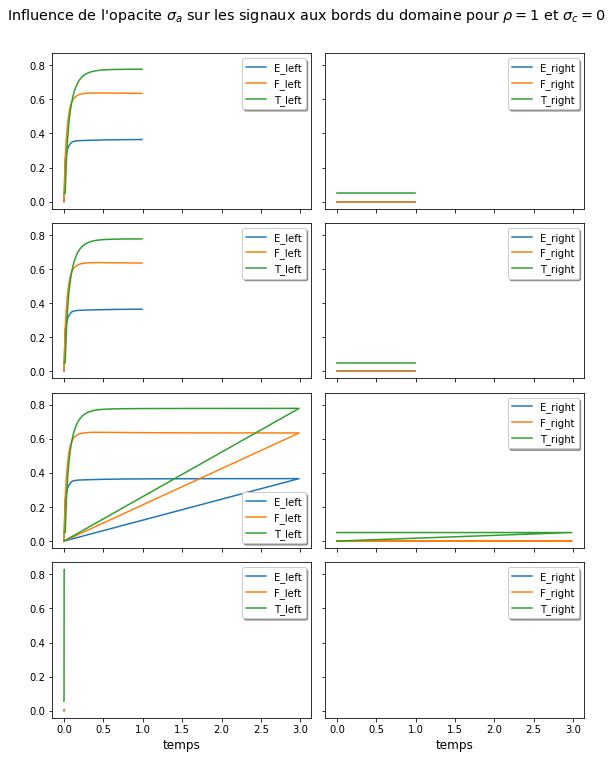

In [286]:
""" Visualisation temporelle """

figsize = (8, 10)
title = r"Influence de l'opacite $\sigma_a$ sur les signaux aux bords du domaine pour $\rho=1$ et $\sigma_c=0$"

plot_group(df_t, figsize, markers_t, index, time, group_3, title)

Lorsque $\sigma_a$ est augente, il semble que:
- La diffusion de l'energie est plus rapide mais garde la meme valeur pic.
- Le flux de photons est attenue pendant le transport.
- Les variations de la temperature sont plus importantes et l'equilibre thermique est plus rapidement atteint.

### $\rho$ nul

In [287]:
condition = (df_s['sigma_a_expr']==0.5)| (df_s['sigma_a_expr']==sigma_a_max)
condition &= (df_s['rho_expr']==0) & (df_s['sigma_c_expr']==0)
index = df_s.loc[condition].index

figsize = (8, 5)
title = r"Influence de l'opacite d'absorption pour $\rho=0$ et $\sigma_c=0$"

plot_group(df_s, figsize, markers_s, index, position, group_1, title)

<Figure size 576x360 with 0 Axes>

pour $\rho$ nul, on n'observe aucun changement par rapport a $\sigma_a$. 

## Influence de l'opacite de diffusion $\sigma_c$

In [288]:
condition = (df_s['sigma_c_expr']==0.5) | (df_s['sigma_c_expr']==1) | (df_s['sigma_c_expr']==2.5) | (df_s['sigma_c_expr']==sigma_a_max)
condition &= (df_s['rho_expr']==0.5) & (df_s['sigma_a_expr']==0.5)
index = df_s.loc[condition].index

figsize = (8, 10)
title = r"Influence de l'opacite de scatering pour $\rho=0.5$ et $\sigma_a=0.5$"

plot_group(df_s, figsize, markers_s, index, position, group_1, title)

<Figure size 576x720 with 0 Axes>

L'opacite de scatering $\sigma_c$ contribue a ettenuer les signaux $E$, $F$. EN effet, la diffusion du signal dans le milieu entraine la diminution de son intensite. L'influence sur $T$ est moins perceptible.

# SYNTHESE
Il remarque que pour les signaux finaux ne depanssent jamais la valeur maximale de depart 1, meme lorsqu'il n'ya aycune absoption ni dissusion ($\sigma_a = \sigma_c = 0$). Ce qui est probablement du au coupalge avec la metiere.


En conlusion l'augmentation de la densite et des opacites a tendance a intensifier le phenomene de diffusion dans le milieu. 